# Imports

## Général

In [60]:
# Librairies
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [61]:
# Fichiers
# url = 'sources/' # Jupyter (local)
url = 'https://raw.githubusercontent.com/gllmfrnr/oc/master/p4/sources/' # Github
customers =       pd.read_csv(url + 'customers.csv')
products =        pd.read_csv(url + 'products.csv')    
transactions =    pd.read_csv(url + 'transactions.csv')

In [62]:
# Styles
# Exemple : print(color.bold + 'Hello' + color.end)
class style:
   blue = '\033[94m'
   green = '\033[92m'
   red = '\033[91m'
   bold = '\033[1m'
   underline = '\033[4m'
   end = '\033[0m' 

## Fonctions

### Exploration

In [63]:
# Exploration des datasets
def exploration(df):
    print( 
        style.red + 'SAMPLE ↓ \n' + style.end,
        df.sample(3), '\n'                                              # Sample
        ) 
    print(style.red + 'INFO ↓ \n' + style.end)
    print(df.info(), '\n')                                              # Colonnes, null-count, types d'objets
    for i in range(0, len(df.columns)):
        print(
            style.red + 'COLONNE',
            style.bold + df.columns[i], ': \n' + style.end,             # Nom de colonne
             df.iloc[:, i].describe(), '\n',                            # .describe()
            sum(df.iloc[:, i].isna()), 'Nan \n',                        # Nbre de Nan 
            df.shape[0] - np.count_nonzero(df.iloc[:, i]), 'zéros \n',  # Nbre de 0
            len(df.iloc[:, i].unique()), 'valeurs uniques : \n'#,
            #df.iloc[:, i].unique(), '\n'                                # Nombre de valeurs uniques 
        )

In [64]:
# Vérification de la clé primaire
def check_pk(df_pk):
  table_length = len(df_pk) - len(df_pk.drop_duplicates())
  if table_length == 0:
    print(style.green + 'C\'est bien une clé primaire (0 duplicat)' + style.end)
  else:
    print(
        style.red + 'Ce n\'est pas une clé primaire (',
        table_length, 'duplicats )' + style.end
        )

### Nettoyage

In [65]:
# Vérification et suppression de duplicats
def duplicats(df):
  print(  # Vérifier présence de duplicats
      len(df), 'lignes avant suppression \n' +
      'Nombre de duplicats :', len(df) - len(df.drop_duplicates())    
  )
  df.drop_duplicates(inplace=True)  # Suppression des duplicats
  print(len(df), 'lignes après suppression')

### Indicateurs

In [101]:
# Indicateurs
def indicateurs(df, variable):
  print(
    # Moyenne des valeurs de la variable
    'Moyenne : ', round(df[variable].mean(), 2), '\n'
    'Médiane : ', round(df[variable].median(), 2), '\n'
    'Mode : ', df[variable].mode().to_string(index=False), '\n'
    'Variance : ', round(df[variable].var(ddof=0), 2), '\n'
    'Écart-type : ', round(df[variable].std(ddof=0), 2), '\n'
    'Mode : ', round(
        df[variable].std(ddof=0) / df[variable].mean()
        , 2), '\n'
    'Skewness : ', round(df[variable].skew(), 2), '\n'
    'Kurtosis : ', round(df[variable].kurtosis(), 2), '\n'
    )

In [66]:
# Indicateurs univariés
def indicateurs_uni(df, variable, type):

  if type == 'quantitative':
    print(
          # Moyenne des valeurs de la variable
          'Moyenne : ', round(df[variable].mean(), 2), '\n'
          'Médiane : ', round(df[variable].median(), 2), '\n'
          'Mode : ', df[variable].mode().to_string(index=False), '\n'
          'Variance : ', round(df[variable].var(ddof=0), 2), '\n'
          'Écart-type : ', round(df[variable].std(ddof=0), 2), '\n'
          'Mode : ', round(
              df[variable].std(ddof=0) / df[variable].mean()
              , 2), '\n'
          'Skewness : ', round(df[variable].skew(), 2), '\n'
          'Kurtosis : ', round(df[variable].kurtosis(), 2), '\n'
          )

  if type == 'qualitative':
    df[variable].value_counts(normalize=True).plot(
        kind='bar', figsize=(4,4))
    plt.show()
  
  # Proportions
  df[variable].value_counts(normalize=True).plot(
      kind='pie', legend=True, autopct='%1.1f%%', figsize=(4,4))
  plt.show()

  # Box plot
  df.boxplot(by=variable)
  plt.show()

In [67]:
# Indicateurs bivariés (?)
def indicateurs_bi(df, mode_categorie, mode_valeurs):

  # Proportion des modalités dans la variable
  df[mode_categorie].value_counts(normalize=True).plot(kind='pie')
  plt.show()

  # Afficher box plots de la catégorie côte à côte
  df.boxplot(by=mode_categorie)
  plt.show()

  print('-'*40)
  print('Valeurs :', mode_valeurs)
  print('-'*40)
  for cat in df[mode_categorie].unique():

    sous_echantillon = df[df[mode_categorie] == cat] # Sélectionner tous les individus de la modalité
    print('-'*20) # Séparateur entre chaque modalité affichée
    print(mode_categorie, ':', cat)    # Nom de la modalité
    print(
        # Moyenne des valeurs de l'échantillon pour la variable
        'Moyenne : ', round(sous_echantillon[mode_valeurs].mean(), 2)) 
    print(
        # Médiane des valeurs de l'échantillon pour la variable
        'Médiane : ', round(sous_echantillon[mode_valeurs].median(), 2)) 
    print(
        # Mode des valeurs de l'échantillon pour la variable
        'Mode : ', sous_echantillon[mode_valeurs].mode().to_string(index=False)) 
    print(
        # Variance empirique
        'Variance : ', round(sous_echantillon[mode_valeurs].var(ddof=0), 2))  
    print(
        # Écart-type empirique
        'Écart-type : ', round(sous_echantillon[mode_valeurs].std(ddof=0), 2)) 
    print(
        # Coefficient de variation
        'Coeff. variation : ', 
        round(
            sous_echantillon[mode_valeurs].std(ddof=0) / sous_echantillon[mode_valeurs].mean(),
            2))
    print(
        # Skewness empirique
        'Skewness : ', round(sous_echantillon[mode_valeurs].skew(), 2)) 
    print(
        # Kurtosis
        'Kurtosis : ', round(sous_echantillon[mode_valeurs].kurtosis(), 2))

    # Créer et afficher histogramme    
    sous_echantillon[mode_valeurs].hist()
    plt.show()

    # Créer et afficher box plot
    sous_echantillon.boxplot(column=[mode_valeurs], vert=False)
    plt.show()

In [68]:
# Courbe de Lorenz et indice de Gini
def lorenz(observations):

  # Nombre d'observations
  n = len(observations)

  # LORENZ ↓↓

  #   ↓ Définir ordonnées
  #   Trier les individus par ordre croissant : np.sort()
  #   Calculer la somme cumulée : np.cumsum()
  #   Normaliser en divisant par la somme totale des observations : / .sum()
  lorenz = np.cumsum(np.sort(observations)) / observations.sum()
  #   La courbe de Lorenz débute à 0 (ajouter valeur 0 avant liste précédente)
  lorenz = np.append([0], lorenz)

  #   ↓ Définir ordonnées, de 0 à 1 à intervalles réguliers
  xaxis = np.linspace(0-1 / n, 1+1 / n, n+1)

  # GINI
  #     Surface sous la courbe de Lorenz
  AUC = (lorenz.sum() - lorenz[-1]/2 -lorenz[0]/2) / n
  #     Surface entre la 1ère bissectrice et la courbe de Lorenz
  S = 0.5 - AUC
  gini = 2*S

  # Afficher la courbe
  plt.axes().axis('equal')
  plt.plot(xaxis, lorenz, drawstyle='steps-post')
  plt.ylim([0,1])
  plt.show()

  print('Indice de Gini :', round(gini, 1))

# Exploration des datasets

### Suppression des duplicats
* Aucun doublon dans **customers** et **products**
* 126 doublons supprimés dans **transactions**

In [69]:
# Customers
duplicats(customers)

8623 lignes avant suppression 
Nombre de duplicats : 0
8623 lignes après suppression


In [70]:
# Products
duplicats(products)

3287 lignes avant suppression 
Nombre de duplicats : 0
3287 lignes après suppression


In [71]:
# Transactions
duplicats(transactions)

337016 lignes avant suppression 
Nombre de duplicats : 126
336890 lignes après suppression


## Customers

* 3 colonnes : **client_id**, **sex**, **birth**
* clé primaire : **client_id**
* aucune valeur manquante

### Variables
* **client_id** (qualitative nominale)
  * identifiant unique pour chaque client
  * aucun doublon
* **sex** (qualitative nominale)
  * 2 valeurs possibles : f ou m
* **birth** (qualitative ordinale)
  * année de naissance du client

In [72]:
# Exploration du dataset
exploration(customers)

SAMPLE ↓ 
      client_id sex  birth
891      c_184   m   2004
2833    c_1768   m   1994
6876     c_590   f   1984 

INFO ↓ 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 269.5+ KB
None 

COLONNE client_id : 
 count       8623
unique      8623
top       c_7346
freq           1
Name: client_id, dtype: object 
 0 Nan 
 0 zéros 
 8623 valeurs uniques : 

COLONNE sex : 
 count     8623
unique       2
top          f
freq      4491
Name: sex, dtype: object 
 0 Nan 
 0 zéros 
 2 valeurs uniques : 

COLONNE birth : 
 count    8623.000000
mean     1978.280877
std        16.919535
min      1929.000000
25%      1966.000000
50%      1979.000000
75%      1992.000000
max      2004.000000
Name: birth, dtype:

In [73]:
# Vérification de la clé primaire
check_pk(customers['client_id'])

C'est bien une clé primaire (0 duplicat)


## Products

* 3 colonnes : **id_prod**, **price**, **categ**
* clé primaire : **id_prod**
* aucune valeur manquante

### Variables
* **id_prod** (qualitative nominale)
  * identifiant unique pour chaque produit
  * aucun doublon
* **price** (quantitative discrète)
  * présence de valeurs aberrantes (inférieures à 0)
* **categ** (qualitative ordonnée)
  * 3 valeurs possibles : 0, 1, 2
  * correspondant a priori à 3 gammes de prix ordonnées

In [74]:
# Exploration du dataset
exploration(products)

SAMPLE ↓ 
      id_prod  price  categ
1095   1_516  24.24      1
2141   0_301   8.99      0
275     0_64   4.22      0 

INFO ↓ 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 102.7+ KB
None 

COLONNE id_prod : 
 count      3287
unique     3287
top       1_485
freq          1
Name: id_prod, dtype: object 
 0 Nan 
 0 zéros 
 3287 valeurs uniques : 

COLONNE price : 
 count    3287.000000
mean       21.856641
std        29.847908
min        -1.000000
25%         6.990000
50%        13.060000
75%        22.990000
max       300.000000
Name: price, dtype: float64 
 0 Nan 
 0 zéros 
 1455 valeurs uniques : 

COLONNE categ : 
 count    3287.000000
mean        0.370246
std         0.615387
min  

In [75]:
# Vérification de la clé primaire
check_pk(products['id_prod'])

C'est bien une clé primaire (0 duplicat)


## Transactions
* 4 colonnes : **id_prod**, **date**, **client_id**, **session_id**
* clé primaire : **date** + **client_id**
* aucune valeur manquante

### 2 clés étrangères
* **id_prod**, vers *products*
* **client_id**, vers *customers*
* les valeurs uniques de ces variables sont moins nombreuses que dans les tables qu'elles référencent :
  * certains articles de *products* n'ont pas été vendus 
  * certains clients de *customers* n'ont pas passé commande


### Variables
* **id_prod** (qualitative nominale)
* **date** (qualitative ordonnée)
  * date de la transaction
  * contient des valeurs aberrantes
* **client_id** (qualitative nominale)
* **session_id** (qualitative ordonnée)
  * identifiant de session
  * une session peut contenir plusieurs dates



In [76]:
# Exploration du dataset
exploration(transactions)

SAMPLE ↓ 
        id_prod                        date session_id client_id
212855  0_1551  2021-03-10 09:31:59.385608     s_4335    c_8441
85705    0_607  2022-02-17 00:04:22.781960   s_166331    c_2959
140166   1_353  2021-09-18 13:41:59.883479    s_91766    c_6924 

INFO ↓ 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336890 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     336890 non-null  object
 1   date        336890 non-null  object
 2   session_id  336890 non-null  object
 3   client_id   336890 non-null  object
dtypes: object(4)
memory usage: 12.9+ MB
None 

COLONNE id_prod : 
 count     336890
unique      3266
top        1_369
freq        1081
Name: id_prod, dtype: object 
 0 Nan 
 0 zéros 
 3266 valeurs uniques : 

COLONNE date : 
 count                              336890
unique                             336855
top       test_2021-03-01 02:30:02.237449
freq         

In [77]:
# Vérification de la clé primaire
check_pk(transactions[['date', 'client_id']])

C'est bien une clé primaire (0 duplicat)


## Data (jointures)
Après les jointures, on remarquera des valeurs manquantes dans les variables **price** et **categ**.

In [78]:
# Jointure externe gauche entre transactions et customers
data = pd.merge(transactions, customers, how='left', on='client_id')

# Jointure externe gauche avec products à droite
data = pd.merge(data, products, how='left', on='id_prod')

data

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.0
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.0
...,...,...,...,...,...,...,...,...
336885,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,31.99,1.0
336886,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,22.99,0.0
336887,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,11.03,0.0
336888,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,50.99,2.0


In [79]:
exploration(data)

SAMPLE ↓ 
        id_prod                        date session_id  ... birth  price  categ
202851  0_1515  2021-09-12 09:18:32.190780    s_88717  ...  1988   6.99    0.0
103568   1_208  2021-10-28 14:01:40.019210   s_111354  ...  1980  14.99    1.0
60854   0_1388  2021-05-30 22:38:41.979101    s_41835  ...  1968  17.15    0.0

[3 rows x 8 columns] 

INFO ↓ 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336890 entries, 0 to 336889
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     336890 non-null  object 
 1   date        336890 non-null  object 
 2   session_id  336890 non-null  object 
 3   client_id   336890 non-null  object 
 4   sex         336890 non-null  object 
 5   birth       336890 non-null  int64  
 6   price       336787 non-null  float64
 7   categ       336787 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 23.1+ MB
None 

COLONNE id_prod : 
 count     336890
uni

# Nettoyage

## Valeurs aberrantes
* Les premières valeurs de la colonne **price** sont inférieures à 0
  * 1 seule valeur : -1
  * valeur présente sur 74 individus
* Les dernières valeurs de la colonne **date** commencent ont pour préfixe 'test_'
  * valeur présente sur 74 individus également
* Ces valeurs aberrantes sont communes aux mêmes 74 lignes : on supprime ces dernières 

In [80]:
# Les plus faibles valeurs de la colonne 'price' : -1
print(data.sort_values(by=['price']).head(3), '\n')

# Nombre d'occurences de la valeur -1
print(data[data['price'] == -1])

       id_prod                             date session_id  ... birth price  categ
109577     T_0  test_2021-03-01 02:30:02.237437        s_0  ...  2001  -1.0    0.0
59039      T_0  test_2021-03-01 02:30:02.237413        s_0  ...  2001  -1.0    0.0
47169      T_0  test_2021-03-01 02:30:02.237430        s_0  ...  2001  -1.0    0.0

[3 rows x 8 columns] 

       id_prod                             date session_id  ... birth price  categ
1431       T_0  test_2021-03-01 02:30:02.237420        s_0  ...  2001  -1.0    0.0
2365       T_0  test_2021-03-01 02:30:02.237446        s_0  ...  2001  -1.0    0.0
2895       T_0  test_2021-03-01 02:30:02.237414        s_0  ...  2001  -1.0    0.0
5955       T_0  test_2021-03-01 02:30:02.237441        s_0  ...  2001  -1.0    0.0
7283       T_0  test_2021-03-01 02:30:02.237434        s_0  ...  2001  -1.0    0.0
...        ...                              ...        ...  ...   ...   ...    ...
264229     T_0  test_2021-03-01 02:30:02.237416        s_0  ...

In [81]:
# Les dernières valeurs de 'date' commencent par le préfixe 'test_'
print(data.sort_values(by=['date']).tail(3), '\n')

# Nombre d'occurences de la valeur -1
print(
    'Il y a',
    data['date'].str.contains('test_').value_counts().tolist()[1],
    'dates avec le préfixe \'test_\''
    )

       id_prod                             date session_id  ... birth price  categ
203184     T_0  test_2021-03-01 02:30:02.237449        s_0  ...  2001  -1.0    0.0
245271     T_0  test_2021-03-01 02:30:02.237449        s_0  ...  2001  -1.0    0.0
38778      T_0  test_2021-03-01 02:30:02.237450        s_0  ...  2001  -1.0    0.0

[3 rows x 8 columns] 

Il y a 74 dates avec le préfixe 'test_'


In [82]:
# La combinaison des 2 valeurs aberrantes renvoie bien aux mêmes lignes
lignes_test = data[(data['price'] == -1) & (data['date'].str.contains('test_'))]

print(lignes_test)

       id_prod                             date session_id  ... birth price  categ
1431       T_0  test_2021-03-01 02:30:02.237420        s_0  ...  2001  -1.0    0.0
2365       T_0  test_2021-03-01 02:30:02.237446        s_0  ...  2001  -1.0    0.0
2895       T_0  test_2021-03-01 02:30:02.237414        s_0  ...  2001  -1.0    0.0
5955       T_0  test_2021-03-01 02:30:02.237441        s_0  ...  2001  -1.0    0.0
7283       T_0  test_2021-03-01 02:30:02.237434        s_0  ...  2001  -1.0    0.0
...        ...                              ...        ...  ...   ...   ...    ...
264229     T_0  test_2021-03-01 02:30:02.237416        s_0  ...  2001  -1.0    0.0
288815     T_0  test_2021-03-01 02:30:02.237415        s_0  ...  2001  -1.0    0.0
293003     T_0  test_2021-03-01 02:30:02.237421        s_0  ...  2001  -1.0    0.0
298292     T_0  test_2021-03-01 02:30:02.237423        s_0  ...  2001  -1.0    0.0
317233     T_0  test_2021-03-01 02:30:02.237448        s_0  ...  2001  -1.0    0.0

[74

In [83]:
# Lignes avant nettoyage
print('Nombre de lignes avant nettoyage :', len(data))

# Supprimer les lignes test de la dataframe, via leur index
data.drop(lignes_test.index, inplace=True)

# Lignes après nettoyage
print('Nombre de lignes après nettoyage :', len(data))

Nombre de lignes avant nettoyage : 336890
Nombre de lignes après nettoyage : 336816


## Valeurs manquantes
* après les jointures ayant abouti sur *data*, on a remarqué des valeurs manquantes dans **price** et **categ**
* elles concernent un seul produit présent dans *transactions*, mais absent de *products*
* les indicateurs montrent que les acheteurs de ce produit sont :
  * à part quasi-égales des femmes et des hommes (légèrement sous-représentés)
  * nés entre 1978 et 1981 (âges médians)
* ce panel de clients a pour habitudes d'acheter :
  * des livres de la catégorie 0
  * pour un prix médian de 9.99
* les indicateurs du dataset *produits* confirment que ce montant est très proche du prix médian de l'ensemble des produits de la catégorie 0 (10.32)
* on remplace donc les valeurs manquantes par la catégorie 0 et un prix de 9.99


In [84]:
# Vérification de la présence de NaN dans les colonnes 'categ' et 'price'
# Et identification du produit concerné
def verif_nan(colonne):
  # Lignes ayant une valeur nulle dans 'colonne'
  null = data[data[colonne].isnull()]
  print(
    'Il y a', len(null), 'lignes ayant Nan pour \'' + colonne + '\' :',
    'toutes ont', null['id_prod'].unique(), 'pour \'id_prod\''
  )

verif_nan('categ')
verif_nan('price')

Il y a 103 lignes ayant Nan pour 'categ' : toutes ont ['0_2245'] pour 'id_prod'
Il y a 103 lignes ayant Nan pour 'price' : toutes ont ['0_2245'] pour 'id_prod'


In [85]:
# Sous-échantillon ne contenant que le produit '0_2245'
produit_2245 = data[data['id_prod']=='0_2245']
produit_2245

,id_prod,date,session_id,client_id,sex,birth,price,categ
6235,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,m,1972,NaN,NaN
10802,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,m,1973,NaN,NaN
14051,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,f,1975,NaN,NaN
17486,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,f,1982,NaN,NaN
21078,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,m,1988,NaN,NaN
...,...,...,...,...,...,...,...,...
322597,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,f,1979,NaN,NaN
329300,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,f,1983,NaN,NaN
330371,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,f,1984,NaN,NaN
335405,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,f,1973,NaN,NaN


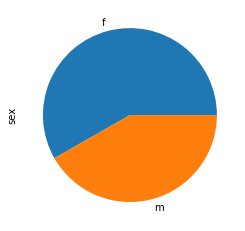

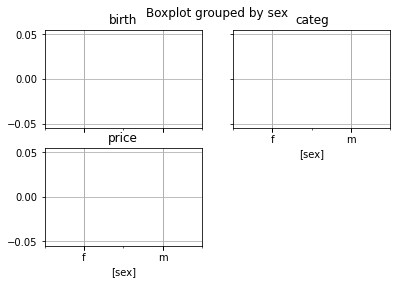

----------------------------------------
Valeurs : birth
----------------------------------------
--------------------
sex : m
Moyenne :  1978.21
Médiane :  1981.0
Mode :   1986
Variance :  150.82
Écart-type :  12.28
Coeff. variation :  0.01
Skewness :  -1.76
Kurtosis :  4.93


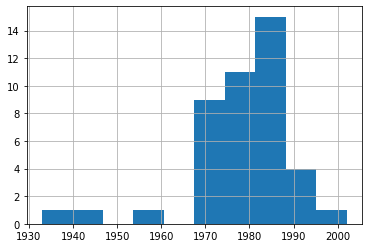

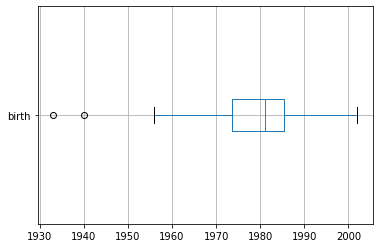

--------------------
sex : f
Moyenne :  1976.58
Médiane :  1978.5
Mode :   1978
Variance :  126.74
Écart-type :  11.26
Coeff. variation :  0.01
Skewness :  -1.37
Kurtosis :  2.88


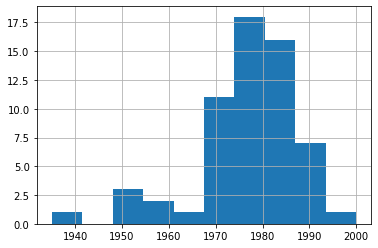

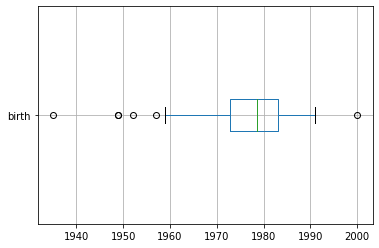

In [86]:
# Indicateurs du sous-échantillon, sur le sexe et l'année de naissance
indicateurs_bi(produit_2245, 'sex', 'birth')

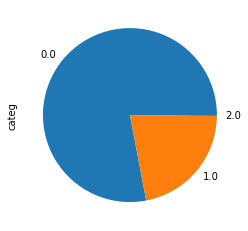

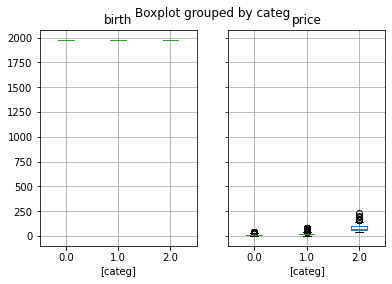

----------------------------------------
Valeurs : price
----------------------------------------
--------------------
categ : 1.0
Moyenne :  20.49
Médiane :  19.44
Mode :   15.99
Variance :  57.65
Écart-type :  7.59
Coeff. variation :  0.37
Skewness :  1.85
Kurtosis :  9.08


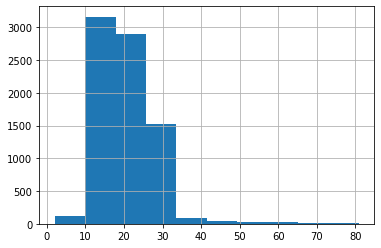

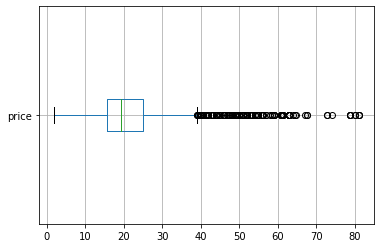

--------------------
categ : 0.0
Moyenne :  10.66
Médiane :  9.99
Mode :   4.99
Variance :  24.36
Écart-type :  4.94
Coeff. variation :  0.46
Skewness :  0.42
Kurtosis :  -0.42


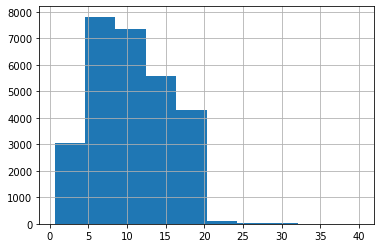

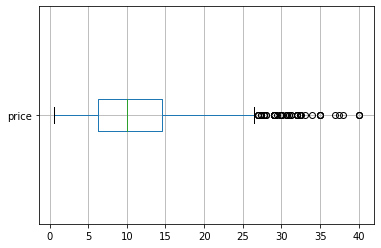

--------------------
categ : 2.0
Moyenne :  82.85
Médiane :  67.57
Mode :   68.99
Variance :  1850.87
Écart-type :  43.02
Coeff. variation :  0.52
Skewness :  1.69
Kurtosis :  2.09


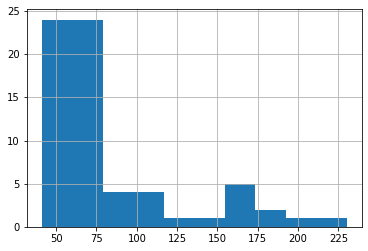

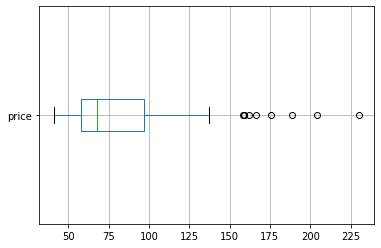

--------------------
categ : nan
Moyenne :  nan
Médiane :  nan
Mode :  Series([], )
Variance :  nan
Écart-type :  nan
Coeff. variation :  nan
Skewness :  nan
Kurtosis :  nan


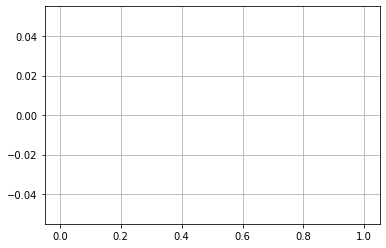

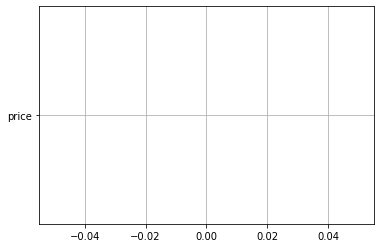

In [87]:
# Création d'un nouveau sous-échantillon représentatif des acheteurs du produit 0_2245
# Délimitation de la classe par les médianes des dates de naissance
panel_produit_2245 = data[(data['birth']>1978) & (data['birth']<1981)]

# Indicateurs du sous-échantillon
indicateurs_bi(panel_produit_2245, 'categ', 'price')

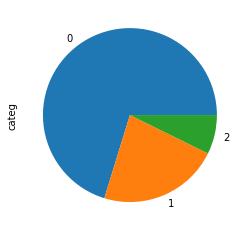

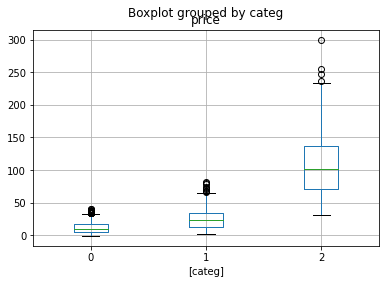

----------------------------------------
Valeurs : price
----------------------------------------
--------------------
categ : 0
Moyenne :  11.73
Médiane :  10.32
Mode :   4.99
Variance :  57.26
Écart-type :  7.57
Coeff. variation :  0.65
Skewness :  0.84
Kurtosis :  0.33


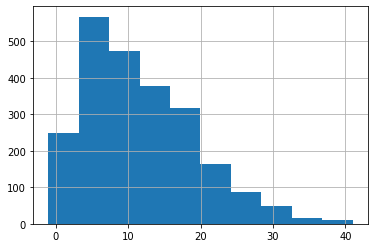

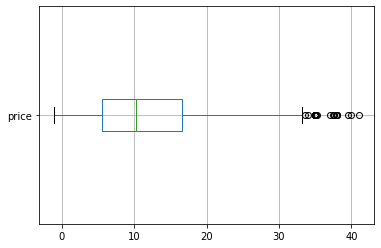

--------------------
categ : 1
Moyenne :  25.53
Médiane :  22.99
Mode :   22.99
 32.99
Variance :  237.61
Écart-type :  15.41
Coeff. variation :  0.6
Skewness :  0.81
Kurtosis :  0.3


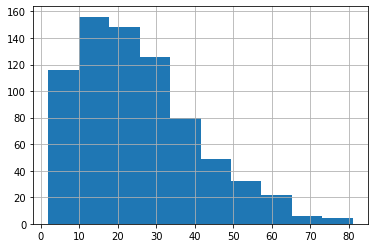

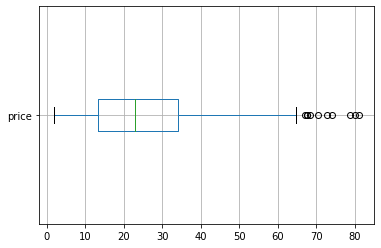

--------------------
categ : 2
Moyenne :  108.35
Médiane :  101.99
Mode :   50.99
 68.99
 69.99
Variance :  2446.06
Écart-type :  49.46
Coeff. variation :  0.46
Skewness :  0.93
Kurtosis :  0.81


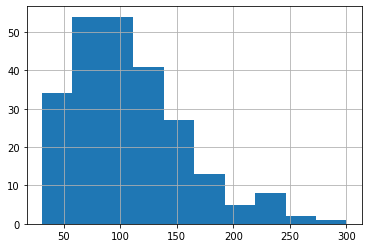

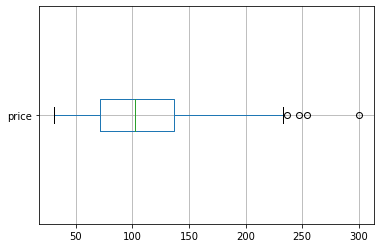

In [88]:
# Indicateurs de la variable 'categ' sur le dataset products
# --> pour la catégorie 0, les indicateurs du dataset correspondent à ceux du sous-échantillon
indicateurs_bi(products, 'categ', 'price')

In [89]:
# Remplacement des valeurs manquantes du produit 0_2245
data['categ'].replace(np.nan, 0, inplace=True)
data['price'].replace(np.nan, 9.99, inplace=True)

data[data['id_prod']=='0_2245']

,id_prod,date,session_id,client_id,sex,birth,price,categ
6235,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,m,1972,9.99,0.0
10802,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,m,1973,9.99,0.0
14051,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,f,1975,9.99,0.0
17486,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,f,1982,9.99,0.0
21078,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,m,1988,9.99,0.0
...,...,...,...,...,...,...,...,...
322597,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,f,1979,9.99,0.0
329300,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,f,1983,9.99,0.0
330371,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,f,1984,9.99,0.0
335405,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,f,1973,9.99,0.0


# Analyse

## Produits

### Catégories
  * 3 valeurs possibles : 0, 1, 2
  * correspondant à 3 gammes de prix ordonnées
    * catégorie 0
      * produits les moins chers (prix médian de 10€, avec un écart-type de 7.5€)
      * la majorité du stock comme des ventes (70% contre 62%)
    * catégorie 1
      * prix intermédiaire (mode et médiane à 22.99€)
      * 22% du stock, 32% des ventes
      * les clients achètent dans cette catégorie des livres moins chers que les moyennes de prix de son stock (achats autour de 20€, moyennes autour de 25€)
      * la seule des catégories à bénéficier d'une proportion de ventes plus importante que sa proportion en rapport du stock
    * Catégorie 2
      * produits au-dessus de 50€ (prix médian de 100€, avec un écart-type de 50€)
      * 7.3% du stock et 5.2% des ventes
      * les clients achètent dans cette catégorie des livres beaucoup moins chers que les moyennes de prix de son stock (achats autour de 65€, moyennes autour de 105€)


---


#### Recommandations


* Réduire de 10% les stocks de la catégorie 0, et combler en augmentant ceux de la catégorie 1
* Baisser légèrement la moyenne des prix du stock de la catégorie 1 (de quelques euros)
* Baisser fortement la moyenne des prix du stock de la catégorie 2 (de quelques dizaines d'euros)




Moyenne :  0.37 
Médiane :  0.0 
Mode :   0 
Variance :  0.38 
Écart-type :  0.62 
Mode :  1.66 
Skewness :  1.44 
Kurtosis :  0.92 



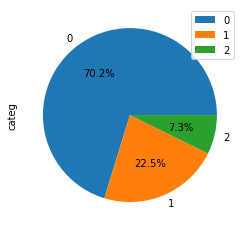

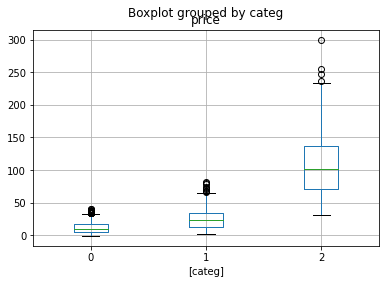

In [90]:
# Variable 'categ' sur products
indicateurs_uni(products, 'categ', 'quantitative')

Moyenne :  0.43 
Médiane :  0.0 
Mode :   0.0 
Variance :  0.35 
Écart-type :  0.59 
Mode :  1.37 
Skewness :  1.03 
Kurtosis :  0.05 



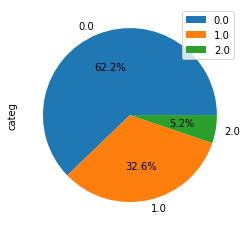

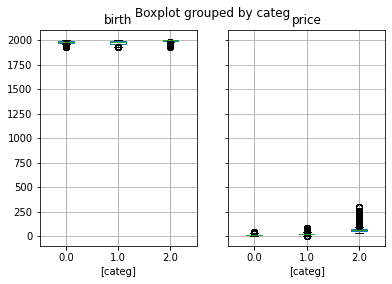

In [91]:
# Variable 'categ' sur data
indicateurs_uni(data, 'categ', 'quantitative')

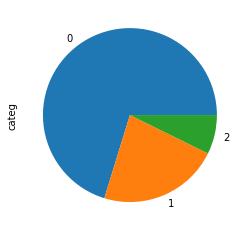

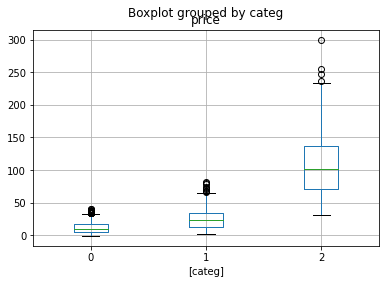

----------------------------------------
Valeurs : price
----------------------------------------
--------------------
categ : 0
Moyenne :  11.73
Médiane :  10.32
Mode :   4.99
Variance :  57.26
Écart-type :  7.57
Coeff. variation :  0.65
Skewness :  0.84
Kurtosis :  0.33


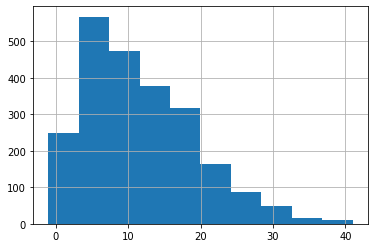

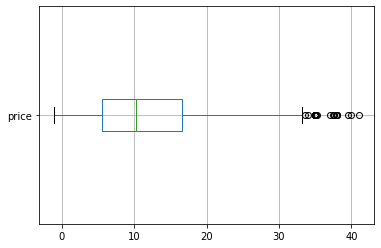

--------------------
categ : 1
Moyenne :  25.53
Médiane :  22.99
Mode :   22.99
 32.99
Variance :  237.61
Écart-type :  15.41
Coeff. variation :  0.6
Skewness :  0.81
Kurtosis :  0.3


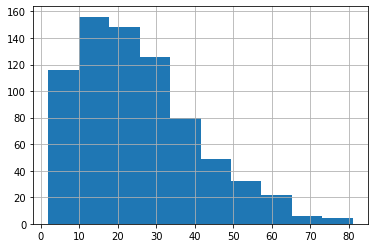

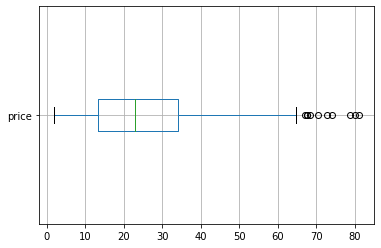

--------------------
categ : 2
Moyenne :  108.35
Médiane :  101.99
Mode :   50.99
 68.99
 69.99
Variance :  2446.06
Écart-type :  49.46
Coeff. variation :  0.46
Skewness :  0.93
Kurtosis :  0.81


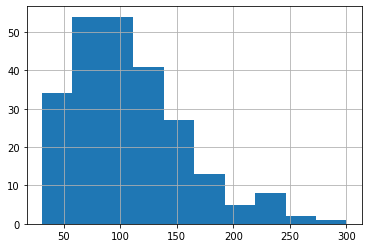

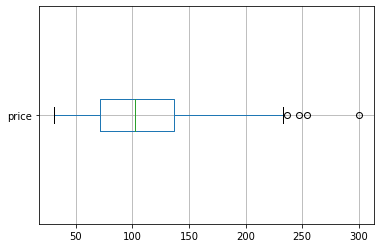

In [92]:
# Prix, par catégorie, sur le dataset products
indicateurs_bi(products, 'categ', 'price')

# --> Catégorie 0 : prix médian de 10.32 (mode : 4.99)
# --> Catégorie 1 : prix médian de 22.99 (identique au mode)
# --> Catégorie 2 : prix médian de 101.99 (plusieurs modes : 50.99, 68.99 ...)

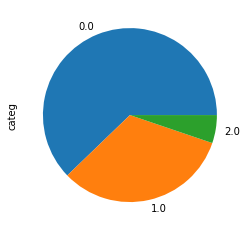

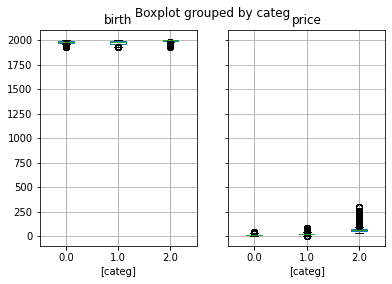

----------------------------------------
Valeurs : price
----------------------------------------
--------------------
categ : 0.0
Moyenne :  10.65
Médiane :  9.99
Mode :   4.99
Variance :  24.29
Écart-type :  4.93
Coeff. variation :  0.46
Skewness :  0.43
Kurtosis :  -0.37


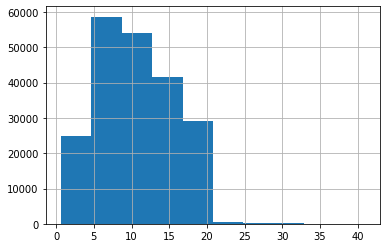

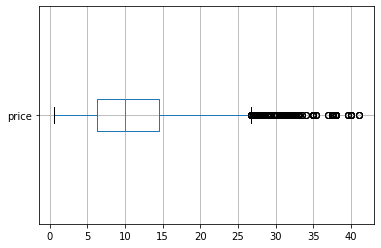

--------------------
categ : 2.0
Moyenne :  75.17
Médiane :  62.83
Mode :   68.99
Variance :  1527.16
Écart-type :  39.08
Coeff. variation :  0.52
Skewness :  2.32
Kurtosis :  5.54


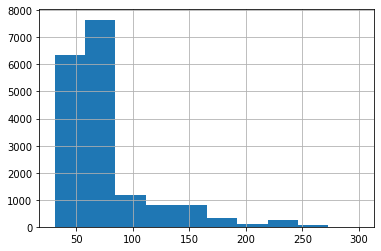

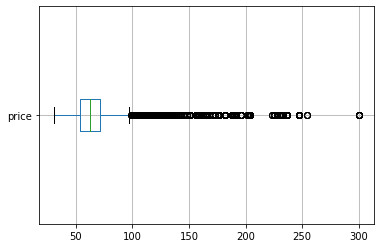

--------------------
categ : 1.0
Moyenne :  20.48
Médiane :  19.08
Mode :   15.99
Variance :  57.29
Écart-type :  7.57
Coeff. variation :  0.37
Skewness :  1.73
Kurtosis :  8.15


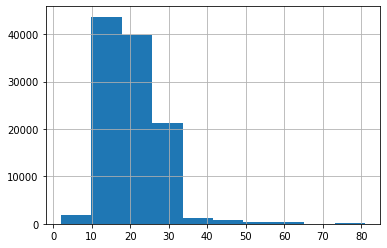

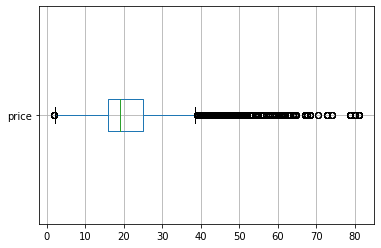

In [93]:
# Prix, par catégorie, sur l'ensemble des transactions :
indicateurs_bi(data, 'categ', 'price')

# --> Catégorie 0 : prix médian de 
# --> Catégorie 1 : prix médian de 
# --> Catégorie 2 : prix médian de 

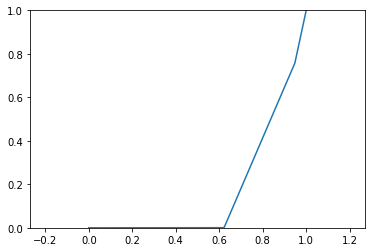

Indice de Gini : 0.7


In [94]:
# Courbe de Lorenz sur 'categ'
lorenz(data['categ'])

# --> ??? Erreur due à la valeur 0 pour cat 0 ???

### Prix
* prix d'achat médian de 13.9€ (correspond à la valeur atteinte par les écarts-types des catégories 0 et 1)
* le montant de 15.99 est le plus fréquent parmi les achats (correspond à la catégorie 1)
* 50% des ventes représentent à peine 25% du chiffre d'affaires

In [102]:
# Indicateurs de la variable 'price'
indicateurs(data, 'price')

Moyenne :  17.21 
Médiane :  13.9 
Mode :   15.99 
Variance :  318.73 
Écart-type :  17.85 
Mode :  1.04 
Skewness :  5.48 
Kurtosis :  45.44 



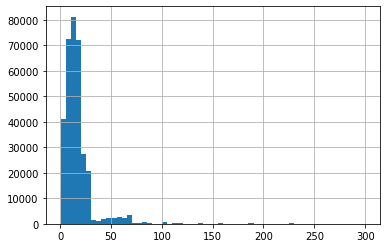

In [122]:
# Histogramme sur les prix des achats
data['price'].hist(bins=60) # Tranches de 5€
plt.show()

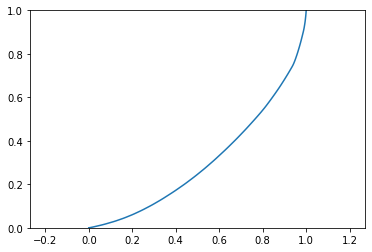

Indice de Gini : 0.4


In [95]:
# Courbe de Lorenz sur 'price'
lorenz(data['price'])

# --> ? 50% des ventes représentent à peine 25% du chiffre d'affaires ?

## Clients

### Démographie
* autant d'hommes que de femmes (très sensiblement plus nombreuses)
* répartition des âges quasiment identique pour les 2 sexes
* la moitié des clients sont nés entre 1966 et 1992 (de 28 à 54 ans à la date de sortie des données) 

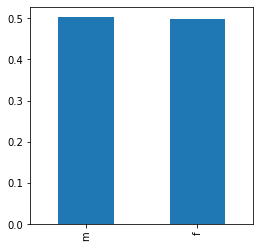

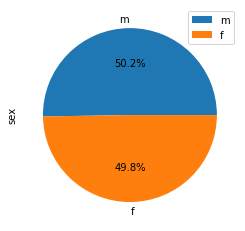

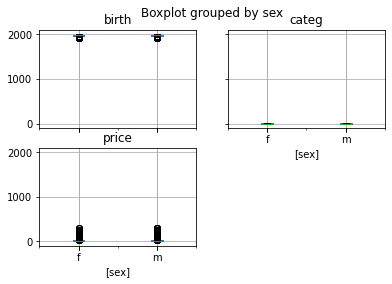

In [96]:
# Variable 'sex' sur les transactions
indicateurs_uni(data, 'sex', 'qualitative')

# --> autant d'hommes que de femmes

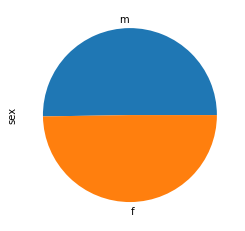

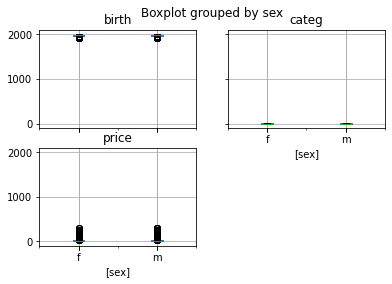

----------------------------------------
Valeurs : birth
----------------------------------------
--------------------
sex : f
Moyenne :  1977.26
Médiane :  1979.0
Mode :   1968
Variance :  191.74
Écart-type :  13.85
Coeff. variation :  0.01
Skewness :  -0.56
Kurtosis :  0.34


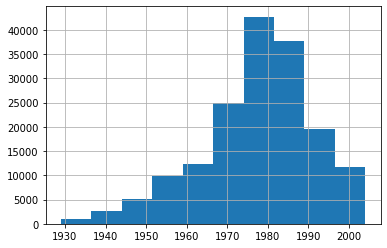

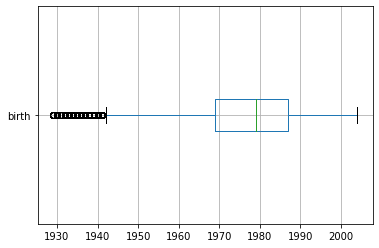

--------------------
sex : m
Moyenne :  1978.38
Médiane :  1980.0
Mode :   1980
Variance :  173.52
Écart-type :  13.17
Coeff. variation :  0.01
Skewness :  -0.59
Kurtosis :  0.56


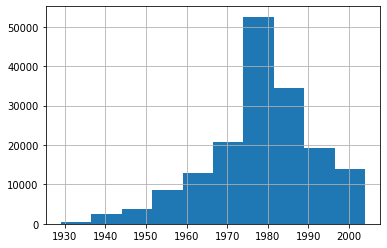

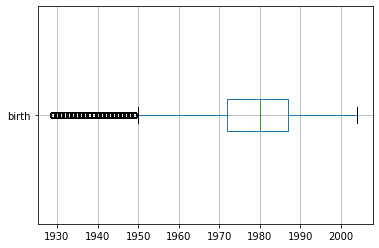

In [97]:
# Dates de naissance des acheteurs, par sexe
indicateurs_bi(data, 'sex', 'birth')

# --> se concentrent entre 1966 et 1992, uniformément pour les 2 sexes
# --> indicateurs d'âge très légèrement inférieur pour les hommes (autour de 1979 pour les 2 sexes, mais mode des femmes à 1968)

### Habitudes d'achat

#### Par sexe : aucune différence notable
* les proportions d'achat entre les 3 catégories sont égales pour les 2 sexes
* les sommes dépensées sont également quasi-égales entre les 2 sexes

#### Par âge : les plus jeunes achètent les livres les plus chers  
* la catégorie 0 est achetée majoritairement par des personnes nées en 1980 (médiane et mode)
* la catégorie 1 est achetées par un panel similaire, mais sensiblement plus vieux (mode à 1980 également, mais médiane à 1975 et écart-type plus grand)
* la catégorie 2, bien que la plus chère, est achetée par des clients en moyenne bien plus jeunes que ceux des autres catégories

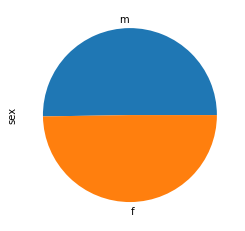

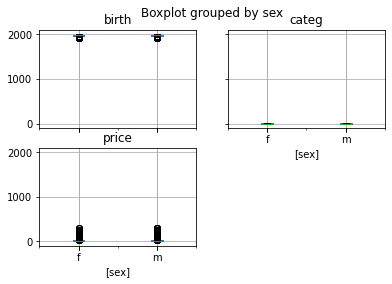

----------------------------------------
Valeurs : categ
----------------------------------------
--------------------
sex : f
Moyenne :  0.43
Médiane :  0.0
Mode :   0.0
Variance :  0.34
Écart-type :  0.59
Coeff. variation :  1.36
Skewness :  1.01
Kurtosis :  0.01


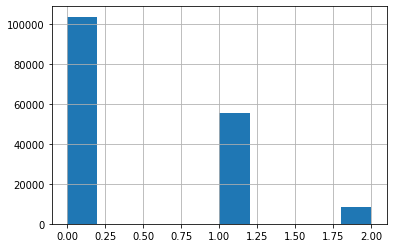

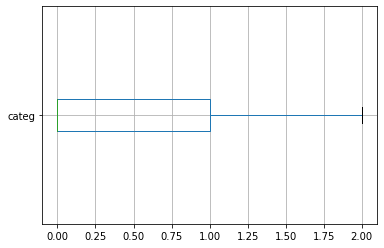

--------------------
sex : m
Moyenne :  0.43
Médiane :  0.0
Mode :   0.0
Variance :  0.35
Écart-type :  0.6
Coeff. variation :  1.38
Skewness :  1.05
Kurtosis :  0.08


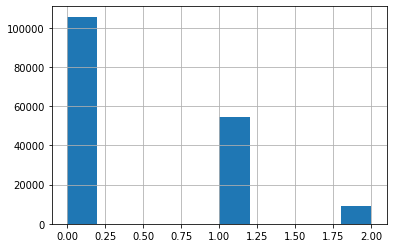

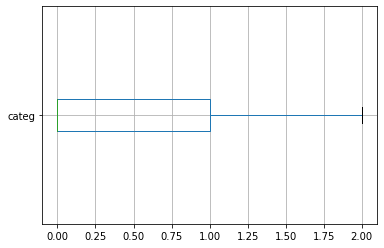

In [98]:
# Catégories, par sexe
indicateurs_bi(data, 'sex', 'categ')

# --> Les 2 sexes ont les mêmes préférences concernant les catégories

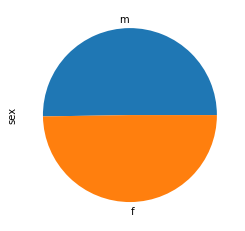

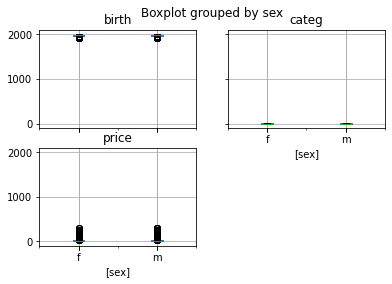

----------------------------------------
Valeurs : price
----------------------------------------
--------------------
sex : f
Moyenne :  17.07
Médiane :  13.94
Mode :   15.99
Variance :  301.37
Écart-type :  17.36
Coeff. variation :  1.02
Skewness :  5.52
Kurtosis :  46.76


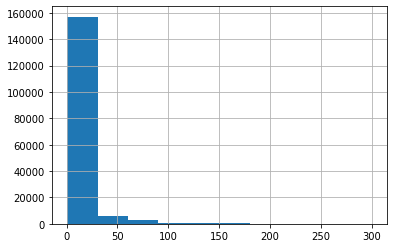

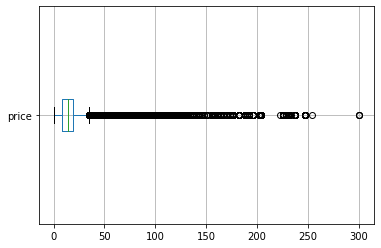

--------------------
sex : m
Moyenne :  17.36
Médiane :  13.83
Mode :   15.99
Variance :  335.88
Écart-type :  18.33
Coeff. variation :  1.06
Skewness :  5.44
Kurtosis :  44.12


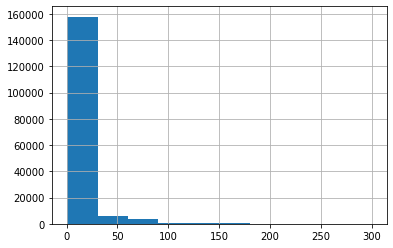

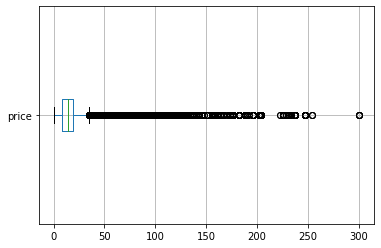

In [99]:
# Prix, par sexe
indicateurs_bi(data, 'sex', 'price')

# --> les 2 sexes dépensent sensiblement les mêmes montants

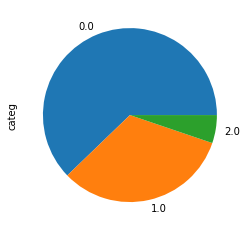

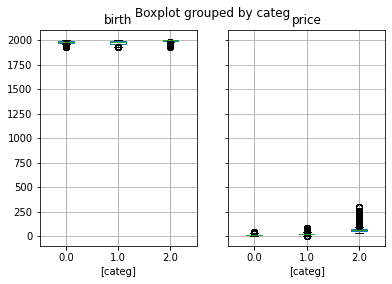

----------------------------------------
Valeurs : birth
----------------------------------------
--------------------
categ : 0.0
Moyenne :  1978.1
Médiane :  1980.0
Mode :   1980
Variance :  125.53
Écart-type :  11.2
Coeff. variation :  0.01
Skewness :  -1.02
Kurtosis :  1.81


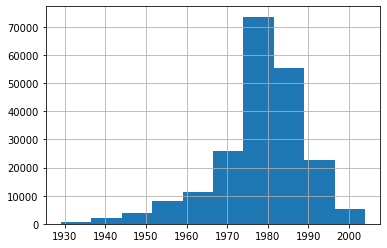

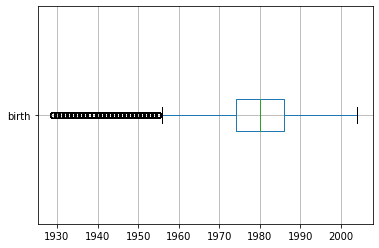

--------------------
categ : 2.0
Moyenne :  1996.27
Médiane :  1999.0
Mode :   2004
Variance :  90.62
Écart-type :  9.52
Coeff. variation :  0.0
Skewness :  -3.01
Kurtosis :  10.81


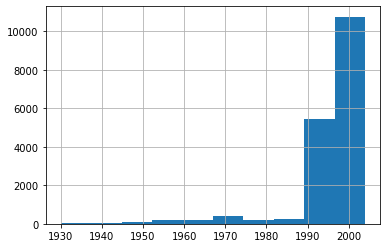

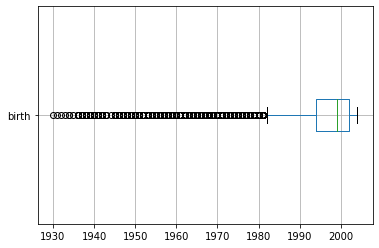

--------------------
categ : 1.0
Moyenne :  1974.34
Médiane :  1975.0
Mode :   1980
Variance :  240.48
Écart-type :  15.51
Coeff. variation :  0.01
Skewness :  -0.19
Kurtosis :  -0.41


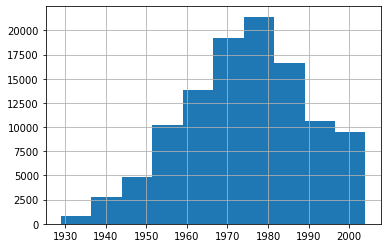

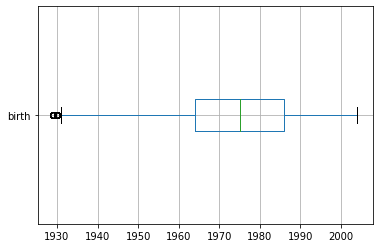

In [100]:
# Années de naissance, par catégorie de produits
indicateurs_bi(data, 'categ', 'birth')

# --> Cat. 0 : date médiane à 1980 (identique au mode)
# --> Cat. 1 : data médiane à 1975 (mode à 1980, comme la cat 0)
# --> Cat. 2 : moyenne, médiane et mode entre 1996 et 2004

# --> Écarts-type de 10 ans pour les cats 0 et 2, et 15 ans pour la cat. 1
# --> Cat. 1 : renforce la tendance à une naissance antérieure aux autres catégories
# --> Cat. 2 : renforce la tendance du panel à se détacher des autres
# --> ---> (1996 - 10 ans = 1985, au-dessus des indicateurs pour les 2 autres catégories)

# Conclusions

## Augmenter l'offre dans la catégorie 1
Proportionnellement au stock, cette catégorie se vend beaucoup plus que la catégorie 0, pourtant plus abordable financièrement. 

## Baisser le prix moyen de la catégorie 2, à destination des plus jeunes
Malgré ses prix élevés, la catégorie 2 attire un public beaucoup plus jeune que les autres. Pourtant les moyennes de prix constatées dans le stock sont largement supérieures aux sommes dépensées par ce segment de clients. La catégorie gagnerait donc à figurer des produits moins chers (autour de 70€), pour renforcer son attrait auprès de clients supposément moins fortunés que les autres.

# Tests 'date'


*   Les achats sont uniformément répartis entre tous les jours de la semaine
*   



In [129]:
from datetime import datetime

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 0 to 336889
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     336816 non-null  object 
 1   date        336816 non-null  object 
 2   session_id  336816 non-null  object 
 3   client_id   336816 non-null  object 
 4   sex         336816 non-null  object 
 5   birth       336816 non-null  int64  
 6   price       336816 non-null  float64
 7   categ       336816 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [123]:
data['date']

0         2021-04-10 18:37:28.723910
1         2022-02-03 01:55:53.276402
2         2021-09-23 15:13:46.938559
3         2021-10-17 03:27:18.783634
4         2021-07-17 20:34:25.800563
                     ...            
336885    2021-05-28 12:35:46.214839
336886    2021-06-19 00:19:23.917703
336887    2021-03-16 17:31:59.442007
336888    2021-10-30 16:50:15.997750
336889    2021-06-26 14:38:19.732946
Name: date, Length: 336816, dtype: object

In [126]:
type(data['date'][0])

str

In [134]:
# Convertir la colonne 'date' en datetime
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 0 to 336889
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     336816 non-null  object        
 1   date        336816 non-null  datetime64[ns]
 2   session_id  336816 non-null  object        
 3   client_id   336816 non-null  object        
 4   sex         336816 non-null  object        
 5   birth       336816 non-null  int64         
 6   price       336816 non-null  float64       
 7   categ       336816 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [137]:
type(data['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

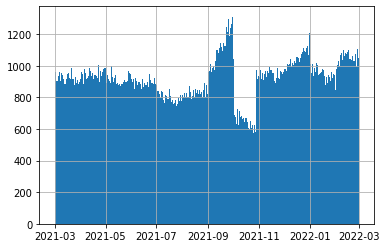

In [177]:
data['date'].sort_values().hist(bins=365)
plt.show()

In [151]:
# Nouvelle colonne date : mois
data['weekday'] = pd.DatetimeIndex(data['date']).weekday
data['day'] = pd.DatetimeIndex(data['date']).day
data['month'] = pd.DatetimeIndex(data['date']).month

In [170]:
len(data['month'].unique())

12

## Mois

Moyenne :  6.48 
Médiane :  6.0 
Mode :   9 
Variance :  12.39 
Écart-type :  3.52 
Mode :  0.54 
Skewness :  0.03 
Kurtosis :  -1.25 



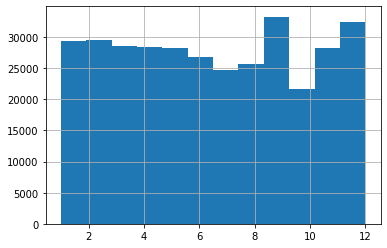

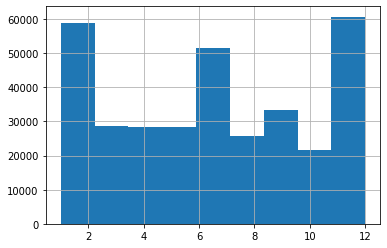

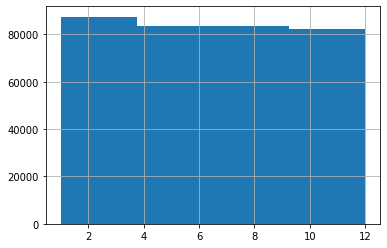

In [166]:
# Indicateurs
indicateurs(data, 'month')

# Histogrammes
data['month'].sort_values().hist(bins=12) # tous les mois de l'année 
plt.show()

data['month'].sort_values().hist(bins=9)  # avec chiffre impair
plt.show()

data['month'].sort_values().hist(bins=4)  # par trimestre
plt.show()

# --> Pic des achats au mois de décembre et septembre (fêtes, et rentrée scolaire)

## Jours de la semaine

Moyenne :  2.99 
Médiane :  3.0 
Mode :   0 
Variance :  4.0 
Écart-type :  2.0 
Mode :  0.67 
Skewness :  0.0 
Kurtosis :  -1.25 



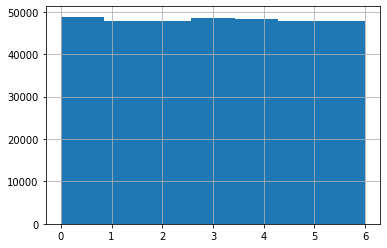

In [158]:
# Indicateurs
indicateurs(data, 'weekday')

# Histogramme
data['weekday'].sort_values().hist(bins=7)
plt.show()

# --> Moyenne et médiane : jeudi
# --> Mode : lundi
# --> Kurtosis négatif : les achats restent relativement étalés sur toute la semaine

## Jours du mois

Moyenne :  15.8 
Médiane :  16.0 
Mode :   28 
Variance :  77.76 
Écart-type :  8.82 
Mode :  0.56 
Skewness :  -0.0 
Kurtosis :  -1.2 



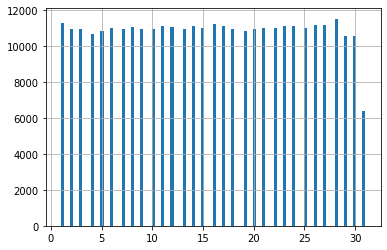

In [175]:
# Indicateurs
indicateurs(data, 'day')

# Histogramme
data['day'].sort_values().hist(bins=100)
plt.show()